<a href="https://colab.research.google.com/github/shivi13102/Vehicles_Efficiency_Rate_Prediction/blob/main/EDA_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

In [44]:
# Load the datasets
train = pd.read_csv("/content/cleaned_train_data.csv")
test = pd.read_csv("/content/cleaned_test_data.csv")

In [45]:
numerical_columns = [
    'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION', 'DISPLACEMENT', 'CAPACITY',
    'PISTON_COUNT', 'BLENDED_CONSUMPTION', 'OUTPUT', 'EFFICIENCY_RATIO', 'YEARS_IN_SERVICE',
    'MILEAGE', 'HIGHWAY_USAGE'
]

categorical_columns = ['GEARBOX_TYPE', 'BODY_STYLE', 'ENERGY_SOURCE']

# **Exploratory Data Analysis** (EDA)

### 1. Descriptive Statistics

In [46]:
# Displaying descriptive statistics for the numerical columns
display(train[numerical_columns].describe())

,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000
mean,0.242026,0.429549,0.347186,0.371640,0.283869,5.753400,0.346595,0.358344,0.577985,10.0,0.441030,0.300291
std,0.147460,0.185905,0.207286,0.226097,0.240546,1.833265,0.214824,0.243412,0.174258,0.0,0.142902,0.206327
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.0,0.000000,0.000000
25%,0.138906,0.289365,0.199219,0.183333,0.187500,4.000000,0.189573,0.158537,0.488889,10.0,0.350000,0.147436
50%,0.207406,0.408840,0.296875,0.366667,0.187500,6.000000,0.298578,0.317073,0.588889,10.0,0.400000,0.262821
75%,0.317714,0.527624,0.460938,0.500000,0.312500,8.000000,0.436019,0.531250,0.688889,10.0,0.550000,0.403846
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,10.0,1.000000,1.000000


## Univariate Analysis:

### 2. Histogram (Numerical Data)

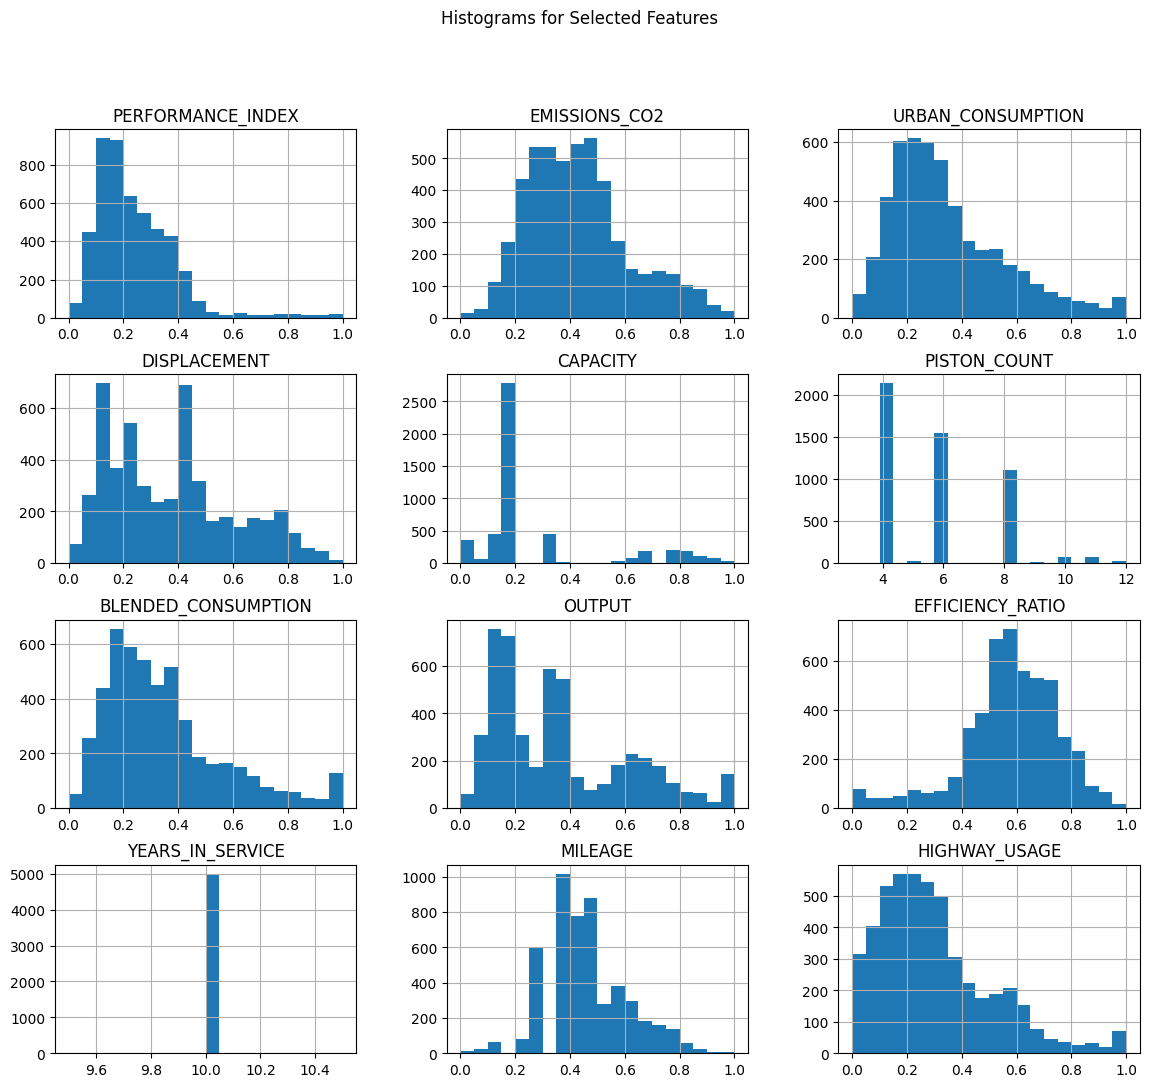

In [47]:
# Plotting histograms for the selected columns
train[numerical_columns].hist(bins=20, figsize=(14, 12))
plt.suptitle('Histograms for Selected Features')
plt.show()

### 3. Bar Plot (Categorical Data)

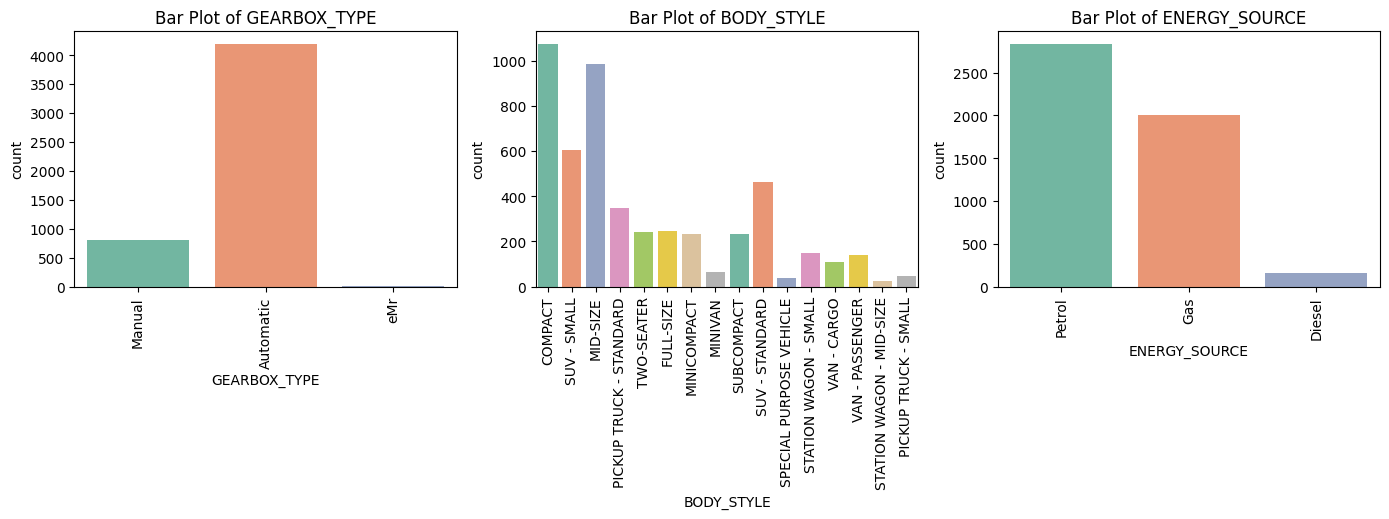

In [48]:
# Plotting bar plots for each categorical column
plt.figure(figsize=(14, 8))

for i, col in enumerate(categorical_columns, 1):
    if col in train.columns:  # Ensure the column exists in the dataset
        plt.subplot(2, 3, i)  # 2 rows, 3 columns
        sns.countplot(data=train, x=col, hue=col, palette='Set2', legend=False)  # Assign x to hue
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=90)  # Set rotation to 90 degrees for vertical labels
    else:
        print(f"Column {col} not found in the dataset.")

plt.tight_layout()
plt.show()

### 4. Skewness and Kurtosis

In [49]:
# Calculating skewness and kurtosis for each selected column
skewness = train[numerical_columns].skew()
kurtosis = train[numerical_columns].kurt()

# Displaying the skewness and kurtosis
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 PERFORMANCE_INDEX      1.825545
EMISSIONS_CO2          0.644267
URBAN_CONSUMPTION      1.018151
DISPLACEMENT           0.567436
CAPACITY               1.487949
PISTON_COUNT           0.786446
BLENDED_CONSUMPTION    1.155193
OUTPUT                 0.880040
EFFICIENCY_RATIO      -0.839696
YEARS_IN_SERVICE       0.000000
MILEAGE                0.522915
HIGHWAY_USAGE          1.064035
dtype: float64

Kurtosis:
 PERFORMANCE_INDEX      5.359589
EMISSIONS_CO2          0.016671
URBAN_CONSUMPTION      0.675657
DISPLACEMENT          -0.568246
CAPACITY               0.976241
PISTON_COUNT           0.029028
BLENDED_CONSUMPTION    0.987981
OUTPUT                -0.147817
EFFICIENCY_RATIO       1.330631
YEARS_IN_SERVICE       0.000000
MILEAGE                0.684299
HIGHWAY_USAGE          1.086715
dtype: float64


### 5. Density Plots (Kernel Density Estimation)

<ipython-input-50-3dc32489754b>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train[col], fill=True, color='skyblue', linewidth=2)


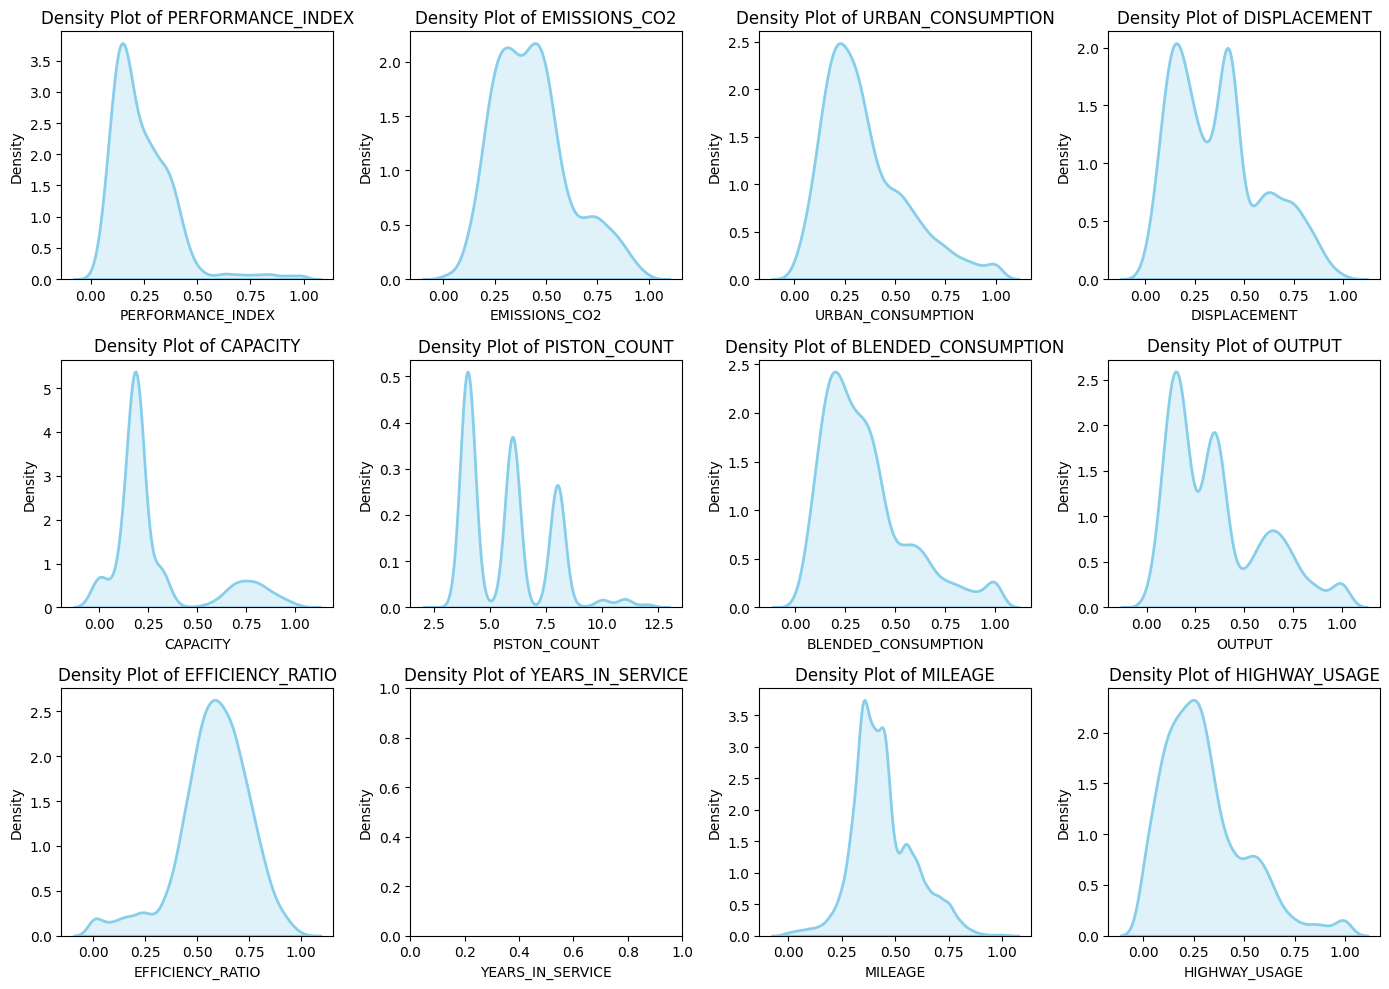

In [50]:
# Plotting density plots for selected columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns
    sns.kdeplot(train[col], fill=True, color='skyblue', linewidth=2)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis:

### 6. Coorelation Metrix

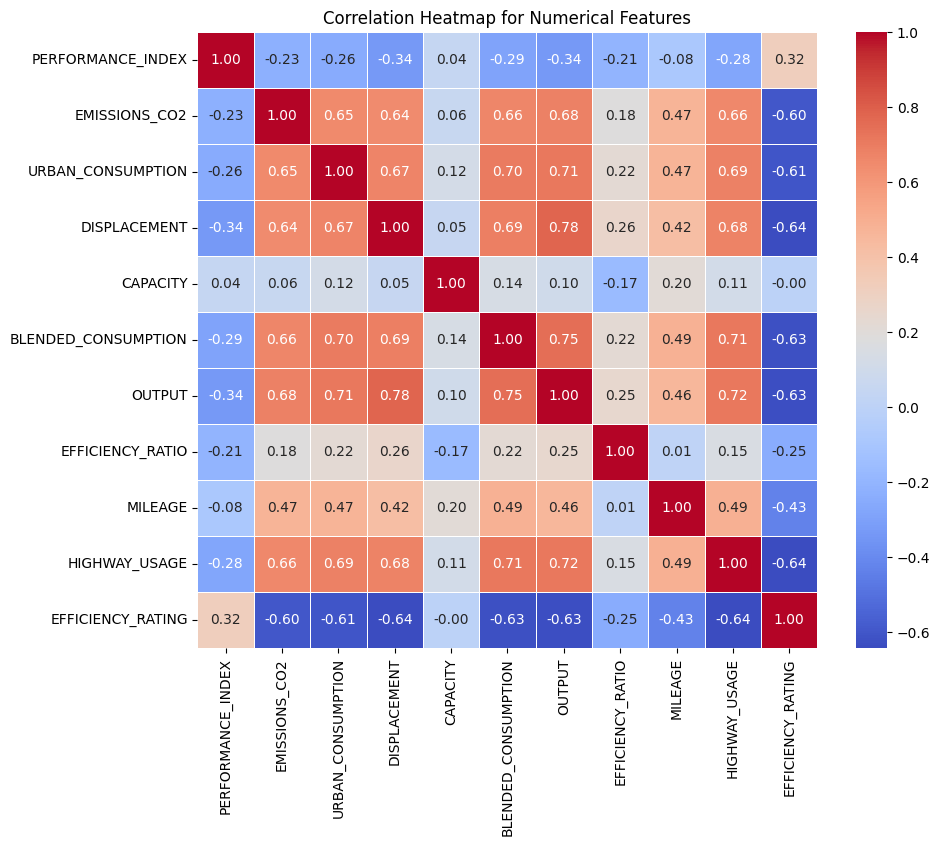

In [51]:
# Calculate correlation matrix
correlation_matrix = train[['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
                            'DISPLACEMENT', 'CAPACITY', 'BLENDED_CONSUMPTION', 'OUTPUT',
                            'EFFICIENCY_RATIO', 'MILEAGE', 'HIGHWAY_USAGE', 'EFFICIENCY_RATING']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

This heatmap visualizes the correlation matrix of several numerical features, likely related to vehicle characteristics and performance. Here's a breakdown of the key observations:

**Strong Positive Correlations:**

*   **Emissions_CO2, Urban_Consumption, Displacement, Blended_Consumption, Output, and Highway_Usage:** These variables exhibit strong positive correlations (generally above 0.6) with each other. This is expected, as larger engines (Displacement) and higher power output (Output) tend to consume more fuel (Urban_Consumption, Blended_Consumption, Highway_Usage) and produce more emissions (Emissions_CO2).
*   **Urban_Consumption and Blended_Consumption:** These are very strongly correlated (around 0.7), which is logical since blended consumption often includes urban driving.

**Strong Negative Correlations:**

*   **Efficiency_Rating with Emissions_CO2, Urban_Consumption, Displacement, Blended_Consumption, Output, and Highway_Usage:** The Efficiency_Rating has a strong negative correlation (around -0.6) with these variables. This indicates that a higher efficiency rating is associated with lower emissions and fuel consumption, which is the desired outcome.

**Weak or Negative Correlations:**

*   **Performance_Index:** This feature shows a weak negative correlation with most other features related to fuel consumption and emissions (around -0.2 to -0.3), suggesting that a higher performance index might be slightly associated with lower emissions and fuel use.
*   **Capacity:** This feature has weak correlations with most other variables, both positive and negative.
*   **Efficiency_Ratio:** This variable has weak correlations with other features.

**Other Observations:**

*   **Mileage:** This feature has moderate positive correlations (around 0.4 to 0.5) with Emissions_CO2, Urban_Consumption, Blended_Consumption, Output, and Highway_Usage. This implies that vehicles with higher mileage might also have slightly higher emissions and fuel consumption.

**Overall Interpretation:**

The heatmap reveals strong relationships between engine size, power, fuel consumption, emissions, and efficiency ratings. Larger engines and higher power generally lead to increased fuel consumption and CO2 emissions, while a higher efficiency rating is associated with lower values in these areas. The Performance_Index has a small negative correlation with fuel consumption and emissions. Capacity seems to be relatively independent of the other variables.

**Important Considerations:**

*   **Correlation does not imply causation:** While the heatmap shows relationships between variables, it doesn't prove cause and effect. There could be other underlying factors influencing these relationships.
*   **Context is key:** The interpretation depends on the specific context of the data and what each feature represents.

In summary, this heatmap provides a valuable overview of the interrelationships between various vehicle characteristics and their impact on fuel efficiency and emissions. It highlights the trade-offs between performance and efficiency. The addition of the "Efficiency Rating" provides a clear inverse relationship with fuel consumption and emissions, which is a key takeaway.


**Implications and Actionable Points:**
* **Performance Improvement:** The negative correlation between the Performance_Index and various other variables suggests that improving performance might lead to reduced emissions and fuel consumption, aligning with sustainable vehicle development goals. You might want to explore vehicles with higher performance indices to investigate whether their environmental impact is lower.

* **Fuel Efficiency and Emissions Reduction:** The strong correlation between Displacement, Output, and Emissions_CO2 suggests a clear area for improvement in reducing the environmental impact of larger engines. You might want to focus on technologies that can achieve higher output without increasing displacement significantly.

* **Blended vs. Urban Consumption:** Since Urban_Consumption and Blended_Consumption are so closely related, focusing on reducing urban consumption might automatically help in lowering blended consumption as well.

* **Exploring Efficiency:** Efficiency_Ratio could be key to identifying vehicles that provide the best performance-to-fuel consumption ratio. Further analysis of this feature might help identify best-in-class models that are both powerful and fuel-efficient.

* **Capacity as a Non-Predictor:** Since Capacity does not show strong correlations with other features, it might not be a useful predictor for performance or fuel consumption. It might be worth investigating whether this feature could be dropped in certain analyses or if it should be combined with others to improve its predictive value.

### 7. Pair Plot

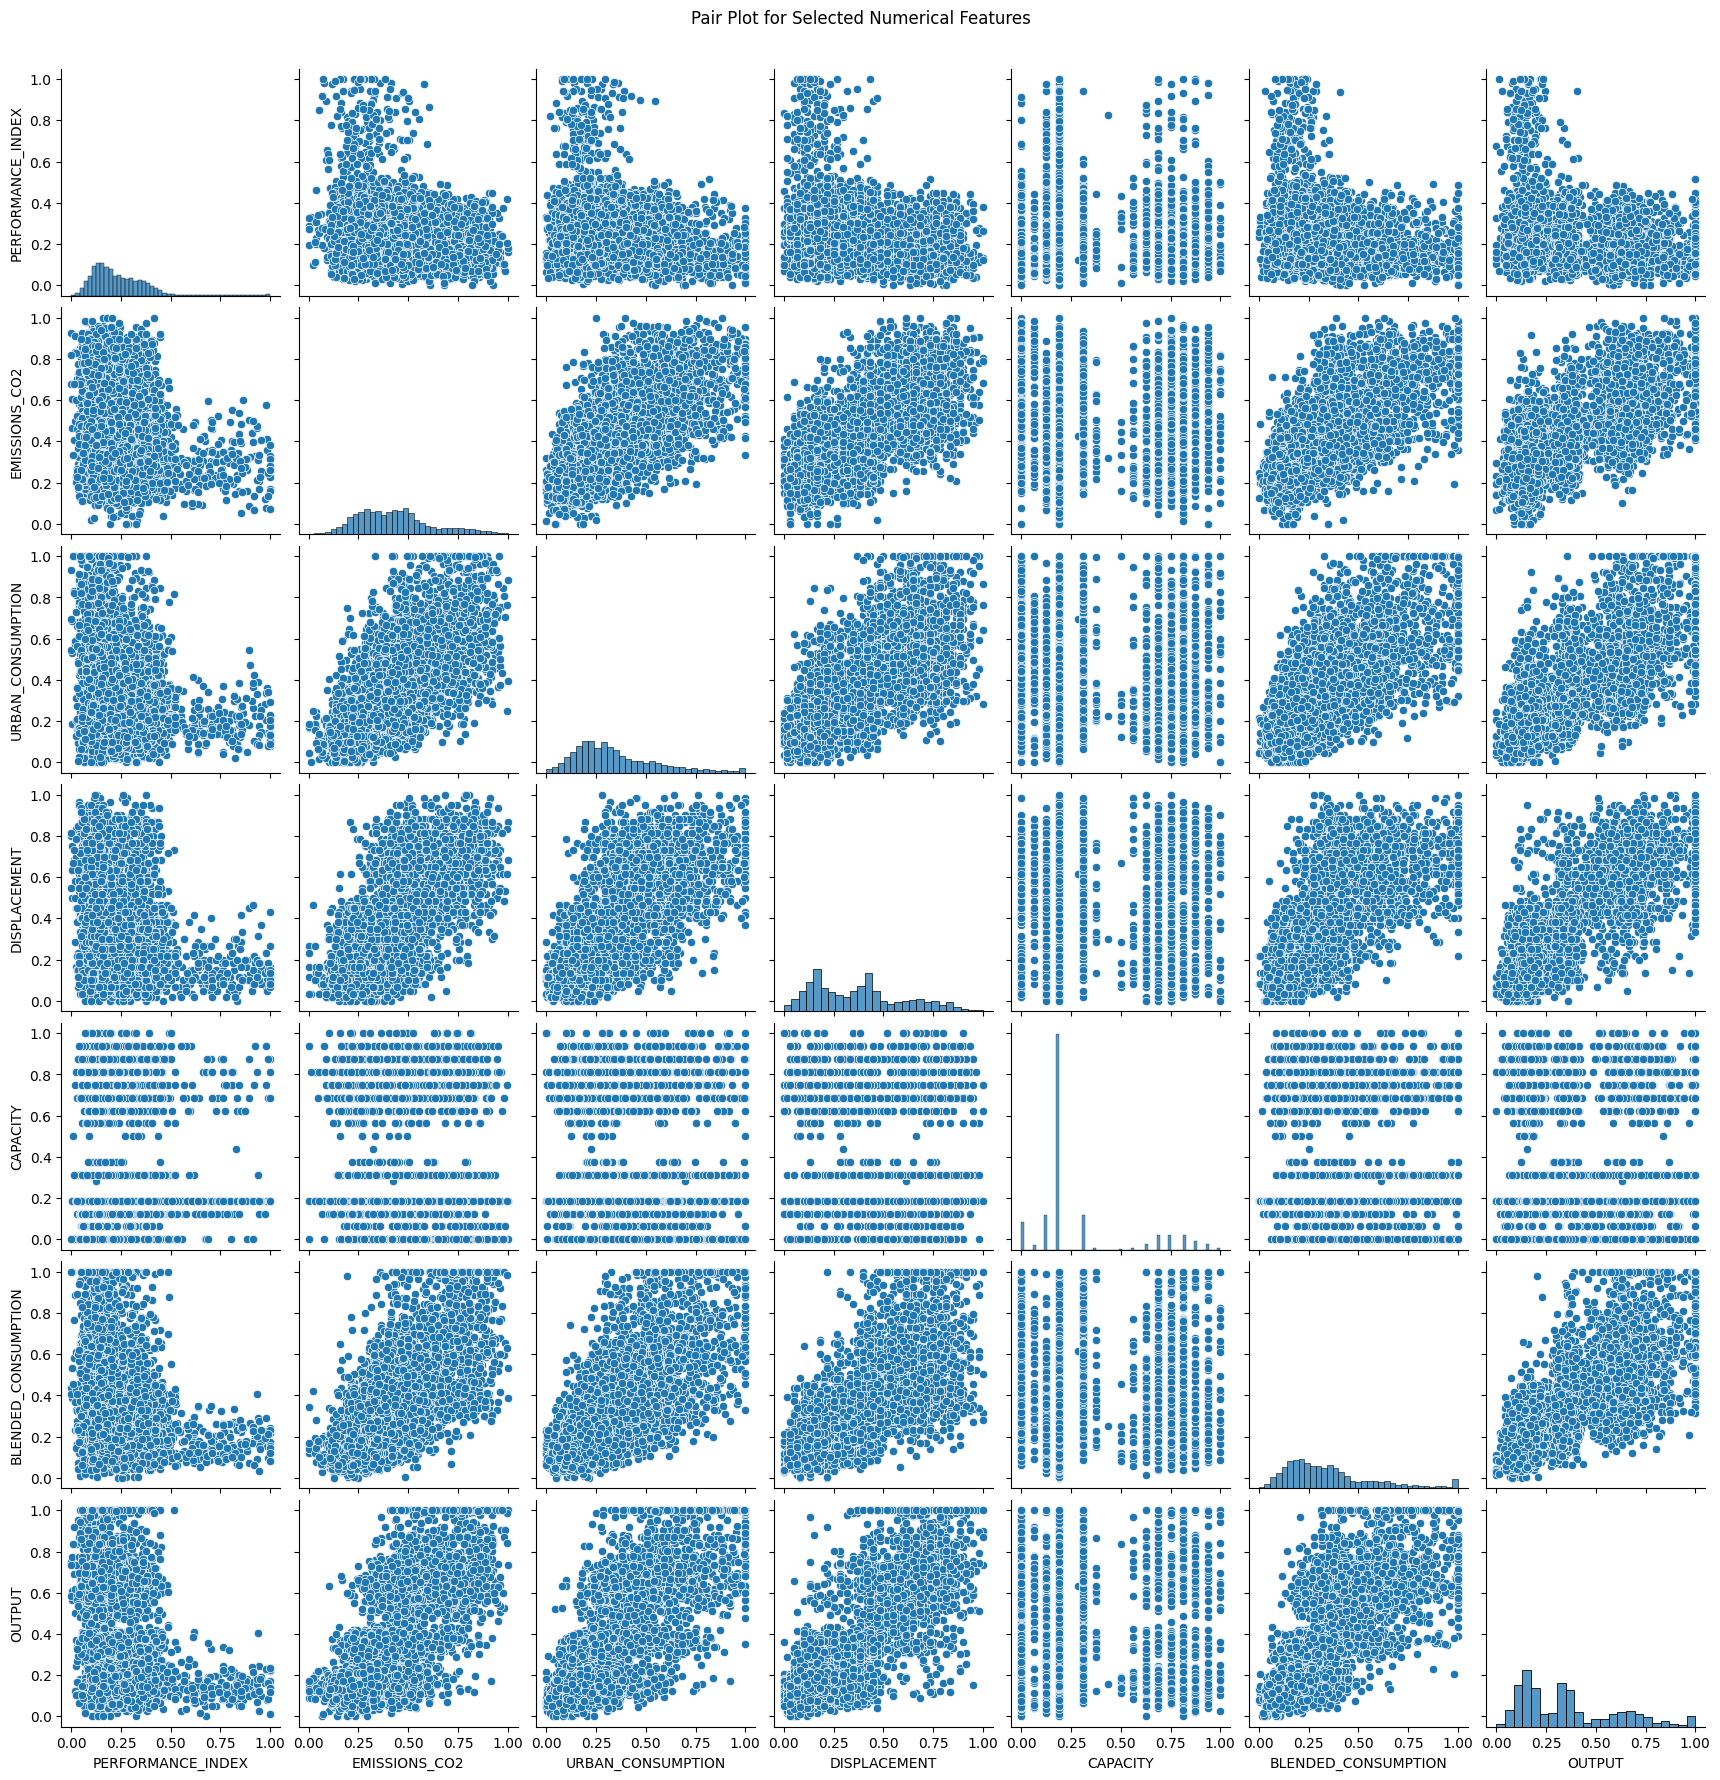

In [52]:
# Pair plot for selected numerical features
sns.pairplot(train[['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
                    'DISPLACEMENT', 'CAPACITY', 'BLENDED_CONSUMPTION', 'OUTPUT']])
plt.suptitle('Pair Plot for Selected Numerical Features', y=1.02)
plt.show()

# **Feature Selection**

### Step 1: Correlation Analysis

In [60]:
efficiency_correlation = correlation_matrix['EFFICIENCY_RATING'].sort_values(ascending=False)
print(efficiency_correlation)

EFFICIENCY_RATING      1.000000
PERFORMANCE_INDEX      0.318978
CAPACITY              -0.001971
EFFICIENCY_RATIO      -0.248464
MILEAGE               -0.434706
EMISSIONS_CO2         -0.602914
URBAN_CONSUMPTION     -0.607637
BLENDED_CONSUMPTION   -0.628320
OUTPUT                -0.631196
DISPLACEMENT          -0.641301
HIGHWAY_USAGE         -0.642417
Name: EFFICIENCY_RATING, dtype: float64


We will exclude:

* ***CAPACITY (-0.001971):*** Weak correlation (absolute value < 0.2).

In [61]:
# Keep features with significant correlation (absolute value > 0.2)
selected_features_corr = efficiency_correlation[abs(efficiency_correlation) > 0.2].index.tolist()
display("Features selected based on correlation:", selected_features_corr)

'Features selected based on correlation:'

['EFFICIENCY_RATING',
 'PERFORMANCE_INDEX',
 'EFFICIENCY_RATIO',
 'MILEAGE',
 'EMISSIONS_CO2',
 'URBAN_CONSUMPTION',
 'BLENDED_CONSUMPTION',
 'OUTPUT',
 'DISPLACEMENT',
 'HIGHWAY_USAGE']

### Step 2: Multicollinearity Check (VIF)

High multicollinearity can cause redundancy in features.

In [81]:
# Subset the dataset with selected features
X_vif = train[selected_features_corr]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF results
print(vif_data)

# Remove features with VIF > 10 (indicative of high multicollinearity)
vif_threshold = 12
selected_features_vif = vif_data[vif_data['VIF'] < vif_threshold]['Feature'].tolist()
print("Features after VIF check:", selected_features_vif)

               Feature        VIF
0    EFFICIENCY_RATING   7.566786
1    PERFORMANCE_INDEX   4.235477
2     EFFICIENCY_RATIO  10.116531
3              MILEAGE  13.415179
4        EMISSIONS_CO2  14.395646
5    URBAN_CONSUMPTION  10.165496
6  BLENDED_CONSUMPTION  10.910499
7               OUTPUT  11.858203
8         DISPLACEMENT  11.152152
9        HIGHWAY_USAGE   8.873684
Features after VIF check: ['EFFICIENCY_RATING', 'PERFORMANCE_INDEX', 'EFFICIENCY_RATIO', 'URBAN_CONSUMPTION', 'BLENDED_CONSUMPTION', 'OUTPUT', 'DISPLACEMENT', 'HIGHWAY_USAGE']


### Step 3: Feature Importance from Random Forest

In [82]:
# Prepare data for modeling
X_rf = train[selected_features_vif].drop(columns=['EFFICIENCY_RATING'])
y_rf = train['EFFICIENCY_RATING']

In [83]:
# Fit a random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_rf, y_rf)

RandomForestRegressor(random_state=42)

In [84]:
# Feature importance ranking
importances = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature importance from Random Forest:\n", importances)

Feature importance from Random Forest:
                Feature  Importance
4               OUTPUT    0.455740
6        HIGHWAY_USAGE    0.155900
3  BLENDED_CONSUMPTION    0.108793
2    URBAN_CONSUMPTION    0.089172
0    PERFORMANCE_INDEX    0.065413
5         DISPLACEMENT    0.063227
1     EFFICIENCY_RATIO    0.061753


* ***Most influential features*** like OUTPUT, HIGHWAY_USAGE, and BLENDED_CONSUMPTION should be prioritized during modeling.
* Features like EFFICIENCY_RATIO, DISPLACEMENT, and PERFORMANCE_INDEX have some predictive value but should be considered for possible exclusion if the goal is to simplify the model.

### Step 4: Statistical Tests (Categorical Features)

In [85]:
categorical_features = ['GEARBOX_TYPE', 'BODY_STYLE', 'ENERGY_SOURCE']  # Example
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(train[categorical_features])
X_cat = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [86]:
# Perform ANOVA
anova_selector = SelectKBest(score_func=f_regression, k='all')
anova_selector.fit(X_cat, y_rf)
anova_importances = pd.DataFrame({
    'Feature': encoder.get_feature_names_out(categorical_features),
    'F-Score': anova_selector.scores_
}).sort_values(by='F-Score', ascending=False)

print("ANOVA feature importance for categorical features:\n", anova_importances)

ANOVA feature importance for categorical features:
                                 Feature     F-Score
0                   GEARBOX_TYPE_Manual  239.525730
13            BODY_STYLE_SUV - STANDARD  216.801633
16           BODY_STYLE_VAN - PASSENGER  191.959178
15               BODY_STYLE_VAN - CARGO  149.883887
7    BODY_STYLE_PICKUP TRUCK - STANDARD  114.424505
10     BODY_STYLE_STATION WAGON - SMALL   74.814331
17                    ENERGY_SOURCE_Gas   64.278062
2                  BODY_STYLE_FULL-SIZE   38.109733
3                   BODY_STYLE_MID-SIZE   31.003119
18                 ENERGY_SOURCE_Petrol   25.753410
12               BODY_STYLE_SUV - SMALL   19.026786
4                BODY_STYLE_MINICOMPACT    7.060575
8    BODY_STYLE_SPECIAL PURPOSE VEHICLE    6.805893
5                    BODY_STYLE_MINIVAN    4.339596
14                BODY_STYLE_TWO-SEATER    3.508563
1                      GEARBOX_TYPE_eMr    2.300134
9   BODY_STYLE_STATION WAGON - MID-SIZE    0.988612
11          

* **Most influential features:** You should prioritize GEARBOX_TYPE_Manual, BODY_STYLE_SUV - STANDARD, and other important body styles like BODY_STYLE_VAN - PASSENGER for model construction.
* **Low-impact features:** Features like BODY_STYLE_MINIVAN and BODY_STYLE_TWO-SEATER could potentially be dropped to reduce complexity without significant loss of predictive power.